<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,44.564963,51.181699,48.781158,68.329277,0.018862,222.875958,222.855922,0.020037
1,0.0,1.0,27.245169,39.577140,60.631221,42.901421,-0.018616,180.336335,180.348782,-0.012447
2,0.0,2.0,80.709859,79.734095,33.498965,69.900448,0.007881,273.851249,273.851179,0.000070
3,0.0,3.0,46.631333,85.803646,72.096882,97.254027,0.005210,311.791099,311.784662,0.006437
4,0.0,4.0,72.635629,89.882480,73.319302,47.987609,-0.016406,293.808614,293.827279,-0.018664
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,48.488162,69.683133,52.874621,43.301087,0.007543,224.354546,224.348417,0.006129
59996,999.0,56.0,69.508466,58.518641,33.541479,49.546120,-0.033336,221.081369,221.110444,-0.029075
59997,999.0,57.0,91.860319,20.424318,95.450493,83.021692,0.039351,300.796173,300.760716,0.035457
59998,999.0,58.0,55.016501,66.719508,78.503595,72.653367,-0.017462,282.875509,282.894887,-0.019378


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    44.564963  51.181699  48.781158  68.329277  0.018862  222.875958   
      1.0    27.245169  39.577140  60.631221  42.901421 -0.018616  180.336335   
      2.0    80.709859  79.734095  33.498965  69.900448  0.007881  273.851249   
      3.0    46.631333  85.803646  72.096882  97.254027  0.005210  311.791099   
      4.0    72.635629  89.882480  73.319302  47.987609 -0.016406  293.808614   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   48.488162  69.683133  52.874621  43.301087  0.007543  224.354546   
      56.0   69.508466  58.518641  33.541479  49.546120 -0.033336  221.081369   
      57.0   91.860319  20.424318  95.450493  83.021692  0.039351  300.796173   
      58.0   55.016501  66.719508  78.503595  72.653367 -0.017462  282.875509   
      59.0   97.721038  95.567076  62.673413  55.711363  0.006121  321.679012   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    222.855922  0.020037  
      1.0    180.348782 -0.012447  
      2.0    273.851179  0.000070  
      3.0    311.784662  0.006437  
      4.0    293.827279 -0.018664  
...                 ...       ...  
999.0 55.0   224.348417  0.006129  
      56.0   221.110444 -0.029075  
      57.0   300.760716  0.035457  
      58.0   282.894887 -0.019378  
      59.0   321.669388  0.009624  

[60000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    44.564963  51.181699  48.781158  68.329277  0.018862  222.875958   
      1.0    27.245169  39.577140  60.631221  42.901421 -0.018616  180.336335   
      2.0    80.709859  79.734095  33.498965  69.900448  0.007881  273.851249   
      3.0    46.631333  85.803646  72.096882  97.254027  0.005210  311.791099   
      4.0    72.635629  89.882480  73.319302  47.987609 -0.016406  293.808614   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   48.488162  69.683133  52.874621  43.301087  0.007543  224.354546   
      56.0   69.508466  58.518641  33.541479  49.546120 -0.033336  221.081369   
      57.0   91.860319  20.424318  95.450493  83.021692  0.039351  300.796173   
      58.0   55.016501  66.719508  78.503595  72.653367 -0.017462  282.875509   
      59.0   97.721038  95.567076  62.673413  55.711363  0.006121  321.679012   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    222.855922  0.020037  
      1.0    180.348782 -0.012447  
      2.0    273.851179  0.000070  
      3.0    311.784662  0.006437  
      4.0    293.827279 -0.018664  
...                 ...       ...  
999.0 55.0   224.348417  0.006129  
      56.0   221.110444 -0.029075  
      57.0   300.760716  0.035457  
      58.0   282.894887 -0.019378  
      59.0   321.669388  0.009624  

[60000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,44.564963,51.181699,48.781158,68.329277,0.018862,222.875958,222.855922,0.020037
1,0.0,1.0,27.245169,39.577140,60.631221,42.901421,-0.018616,180.336335,180.348782,-0.012447
2,0.0,2.0,80.709859,79.734095,33.498965,69.900448,0.007881,273.851249,273.851179,0.000070
3,0.0,3.0,46.631333,85.803646,72.096882,97.254027,0.005210,311.791099,311.784662,0.006437
4,0.0,4.0,72.635629,89.882480,73.319302,47.987609,-0.016406,293.808614,293.827279,-0.018664
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,48.488162,69.683133,52.874621,43.301087,0.007543,224.354546,224.348417,0.006129
59996,999.0,56.0,69.508466,58.518641,33.541479,49.546120,-0.033336,221.081369,221.110444,-0.029075
59997,999.0,57.0,91.860319,20.424318,95.450493,83.021692,0.039351,300.796173,300.760716,0.035457
59998,999.0,58.0,55.016501,66.719508,78.503595,72.653367,-0.017462,282.875509,282.894887,-0.019378


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    44.564963  51.181699  48.781158  68.329277  0.018862  222.875958   
      1.0    27.245169  39.577140  60.631221  42.901421 -0.018616  180.336335   
      2.0    80.709859  79.734095  33.498965  69.900448  0.007881  273.851249   
      3.0    46.631333  85.803646  72.096882  97.254027  0.005210  311.791099   
      4.0    72.635629  89.882480  73.319302  47.987609 -0.016406  293.808614   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   48.488162  69.683133  52.874621  43.301087  0.007543  224.354546   
      56.0   69.508466  58.518641  33.541479  49.546120 -0.033336  221.081369   
      57.0   91.860319  20.424318  95.450493  83.021692  0.039351  300.796173   
      58.0   55.016501  66.719508  78.503595  72.653367 -0.017462  282.875509   
      59.0   97.721038  95.567076  62.673413  55.711363  0.006121  321.679012   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    222.855922  0.020037  
      1.0    180.348782 -0.012447  
      2.0    273.851179  0.000070  
      3.0    311.784662  0.006437  
      4.0    293.827279 -0.018664  
...                 ...       ...  
999.0 55.0   224.348417  0.006129  
      56.0   221.110444 -0.029075  
      57.0   300.760716  0.035457  
      58.0   282.894887 -0.019378  
      59.0   321.669388  0.009624  

[60000 rows x 8 columns]

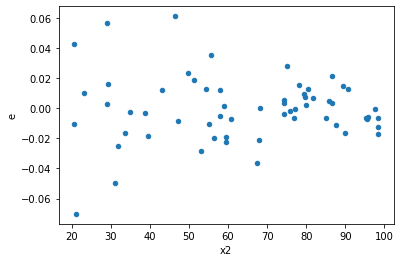

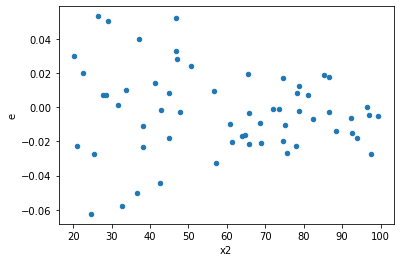

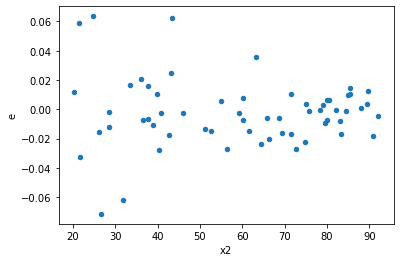

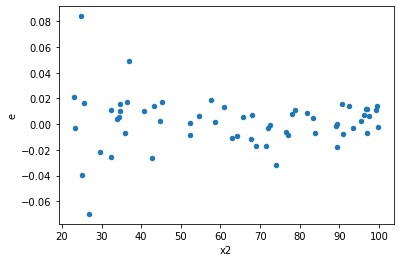

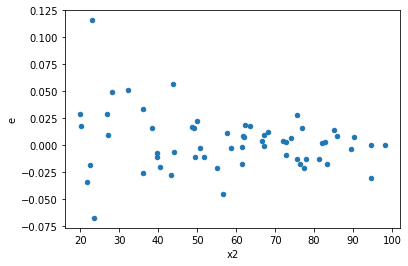

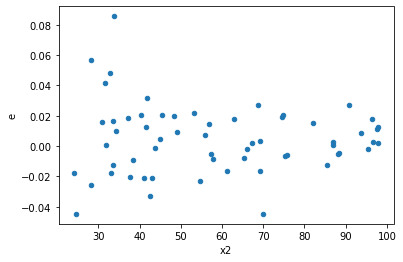

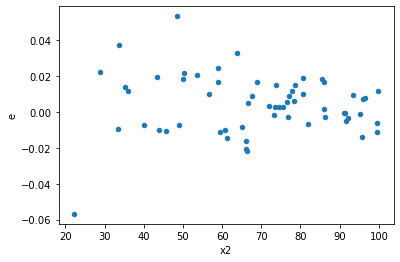

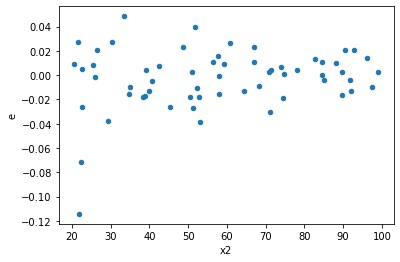

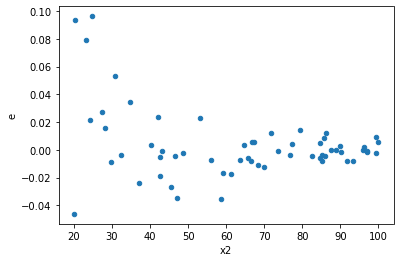

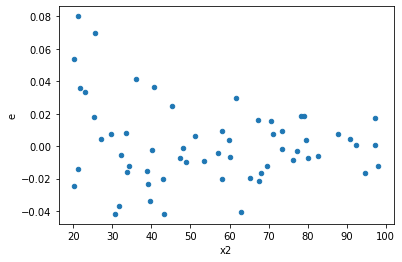

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,26.0,26.0,0.004253134728540159,0.02209616234395081,0.00016358210494385228,0.000849852397844262,5.195265081935242,7.566699902361584e-05,0.9999621665004882,3.783349951180792e-05,Reject001=0 : Heteroscedasticity
1.0,34.0,18.0,0.01038759927122203,0.019338487913049606,0.00030551762562417735,0.001074360439613867,3.5165252329351917,0.006337122564010311,0.9968314387179948,0.0031685612820051556,Reject001=0 : Heteroscedasticity
3.0,28.0,24.0,0.0030996623389797037,0.020392314457493545,0.00011070222639213228,0.000849679769062231,7.675362969236711,3.115771297412806e-06,0.9999984421143513,1.557885648706403e-06,Reject001=0 : Heteroscedasticity
4.0,25.0,27.0,0.01585307059967175,0.017469008738588192,0.00063412282398687,0.0006470003236514145,1.020307579505782,0.9555062926934736,0.5222468536532632,0.4777531463467368,Reject001=1 : Homoscedasticity
5.0,22.0,30.0,0.005090889468664067,0.02123217621353264,0.0002314040667574576,0.0007077392071177547,3.0584562191794147,0.004827647380858391,0.9975861763095708,0.0024138236904291954,Reject001=0 : Heteroscedasticity
10.0,30.0,22.0,0.020046834407756828,0.016436618851527064,0.0006682278135918942,0.0007471190387057756,1.1180603732876981,0.7971182055763193,0.6014408972118404,0.39855910278815965,Reject001=1 : Homoscedasticity
12.0,16.0,36.0,0.005370950675076431,0.017684139080780405,0.0003356844171922769,0.0004912260855772334,1.4633568328429845,0.33643355058860247,0.8317832247056988,0.16821677529430124,Reject001=1 : Homoscedasticity
13.0,24.0,28.0,0.0032559245701718454,0.011834530939069422,0.00013566352375716023,0.00042266181925247934,3.115515560461561,0.004531159147504127,0.9977344204262479,0.0022655795737520634,Reject001=0 : Heteroscedasticity
15.0,36.0,16.0,0.007003345243385025,0.005547626498403048,0.00019453736787180626,0.0003467266561501905,1.7823139068000138,0.21621912114721864,0.8918904394263907,0.10810956057360932,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,26.0,26.0,0.004253134728540159,0.02209616234395081,0.00016358210494385228,0.000849852397844262,5.195265081935242,7.566699902361584e-05,Reject001=0 : Heteroscedasticity
1.0,34.0,18.0,0.01038759927122203,0.019338487913049606,0.00030551762562417735,0.001074360439613867,3.5165252329351917,0.006337122564010311,Reject001=0 : Heteroscedasticity
2.0,35.0,17.0,0.024205931850562308,0.005381515065917755,0.0006915980528732088,0.0003165597097598679,0.4577220951457812,0.04973963925312311,Reject001=1 : Homoscedasticity
3.0,28.0,24.0,0.0030996623389797037,0.020392314457493545,0.00011070222639213228,0.000849679769062231,7.675362969236711,3.115771297412806e-06,Reject001=0 : Heteroscedasticity
4.0,25.0,27.0,0.01585307059967175,0.017469008738588192,0.00063412282398687,0.0006470003236514145,1.020307579505782,0.9555062926934736,Reject001=1 : Homoscedasticity
5.0,22.0,30.0,0.005090889468664067,0.02123217621353264,0.0002314040667574576,0.0007077392071177547,3.0584562191794147,0.004827647380858391,Reject001=0 : Heteroscedasticity
6.0,30.0,22.0,0.012043950434715185,0.002969287201293266,0.00040146501449050617,0.00013496760005878483,0.336187700515001,0.005957854263407746,Reject001=0 : Heteroscedasticity
7.0,28.0,24.0,0.02000966915378949,0.008997644780799799,0.0007146310412067675,0.0003749018658666583,0.5246089859650894,0.10231168773146528,Reject001=1 : Homoscedasticity
8.0,23.0,29.0,0.013753359189167865,0.006385287482400227,0.0005979721386594724,0.0002201823269793182,0.36821502666147726,0.016460902186857782,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      741
Reject001=0 : Heteroscedasticity    259
Name: Result_test, dtype: int64